In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [3]:
# Import file
file = "Resources/Mortality_Rate.txt"
df = pd.read_csv(file, encoding="ISO-8859-1", sep='\t')
display(df)

,Notes,Leading Cancer Sites,Leading Cancer Sites Code,State,State Code,Year,Year Code,Race,Race Code,Sex,Sex Code,Deaths,Population,Age-Adjusted Rate
0,NaN,Breast,26000.0,Alabama,1.0,2000.0,2000.0,Black or African American,2054-5,Female,F,166.0,627439.0,29.7
1,NaN,Breast,26000.0,Alabama,1.0,2000.0,2000.0,White,2106-3,Female,F,524.0,1643761.0,25.9
2,NaN,Breast,26000.0,Alabama,1.0,2001.0,2001.0,Black or African American,2054-5,Female,F,219.0,630901.0,38.7
3,NaN,Breast,26000.0,Alabama,1.0,2001.0,2001.0,White,2106-3,Female,F,528.0,1645541.0,25.8
4,NaN,Breast,26000.0,Alabama,1.0,2002.0,2002.0,Black or African American,2054-5,Female,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,data set. Death rates may differ slightly from...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,"4. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop all columns without any information
df_dropped = df.drop(columns=['Notes','Leading Cancer Sites Code','Year Code','Sex' ],axis=1)
df_dropped = df_dropped.dropna(how='any')
display(df_dropped)

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
0,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,166.0,627439.0,29.7
1,Breast,Alabama,1.0,2000.0,White,2106-3,F,524.0,1643761.0,25.9
2,Breast,Alabama,1.0,2001.0,Black or African American,2054-5,F,219.0,630901.0,38.7
3,Breast,Alabama,1.0,2001.0,White,2106-3,F,528.0,1645541.0,25.8
4,Breast,Alabama,1.0,2002.0,Black or African American,2054-5,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...
1962,Breast,Wyoming,56.0,2014.0,White,2106-3,F,50.0,268767.0,14.1
1963,Breast,Wyoming,56.0,2015.0,White,2106-3,F,68.0,270054.0,19.7
1964,Breast,Wyoming,56.0,2016.0,White,2106-3,F,68.0,269349.0,20.0
1965,Breast,Wyoming,56.0,2017.0,White,2106-3,F,56.0,266963.0,16.5


In [6]:
df_no_other_race = df_dropped[df_dropped["Race"]!="Other Races and Unknown combined"]
df_no_other_race

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
0,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,166.0,627439.0,29.7
1,Breast,Alabama,1.0,2000.0,White,2106-3,F,524.0,1643761.0,25.9
2,Breast,Alabama,1.0,2001.0,Black or African American,2054-5,F,219.0,630901.0,38.7
3,Breast,Alabama,1.0,2001.0,White,2106-3,F,528.0,1645541.0,25.8
4,Breast,Alabama,1.0,2002.0,Black or African American,2054-5,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...
1962,Breast,Wyoming,56.0,2014.0,White,2106-3,F,50.0,268767.0,14.1
1963,Breast,Wyoming,56.0,2015.0,White,2106-3,F,68.0,270054.0,19.7
1964,Breast,Wyoming,56.0,2016.0,White,2106-3,F,68.0,269349.0,20.0
1965,Breast,Wyoming,56.0,2017.0,White,2106-3,F,56.0,266963.0,16.5


In [7]:
df_clean_male = df_no_other_race[df_no_other_race["Sex Code"]!="F"]
df_clean_male

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
147,Breast,California,6.0,2000.0,White,2106-3,M,33.0,13444200.0,0.3
151,Breast,California,6.0,2001.0,White,2106-3,M,29.0,13592819.0,0.3
155,Breast,California,6.0,2002.0,White,2106-3,M,36.0,13697250.0,0.3
160,Breast,California,6.0,2003.0,White,2106-3,M,29.0,13786662.0,0.3
165,Breast,California,6.0,2004.0,White,2106-3,M,23.0,13866357.0,0.2
...,...,...,...,...,...,...,...,...,...,...
1722,Breast,Texas,48.0,2014.0,White,2106-3,M,19.0,10905621.0,0.2
1726,Breast,Texas,48.0,2015.0,White,2106-3,M,28.0,11076989.0,0.3
1730,Breast,Texas,48.0,2016.0,White,2106-3,M,20.0,11220667.0,0.2
1734,Breast,Texas,48.0,2017.0,White,2106-3,M,27.0,11338290.0,0.2


In [9]:
df_clean_male_only = df_clean_male.drop(columns=['Leading Cancer Sites','State','State Code','Year', 'Race Code', 'Age-Adjusted Rate' ],axis=1)
df_clean_male_only

,Race,Sex Code,Deaths,Population
147,White,M,33.0,13444200.0
151,White,M,29.0,13592819.0
155,White,M,36.0,13697250.0
160,White,M,29.0,13786662.0
165,White,M,23.0,13866357.0
...,...,...,...,...
1722,White,M,19.0,10905621.0
1726,White,M,28.0,11076989.0
1730,White,M,20.0,11220667.0
1734,White,M,27.0,11338290.0


In [10]:
df_clean_male_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 147 to 1738
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Race        114 non-null    object 
 1   Sex Code    114 non-null    object 
 2   Deaths      114 non-null    float64
 3   Population  114 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.5+ KB


In [11]:
df_clean_male_only.dtypes

Race           object
Sex Code       object
Deaths        float64
Population    float64
dtype: object

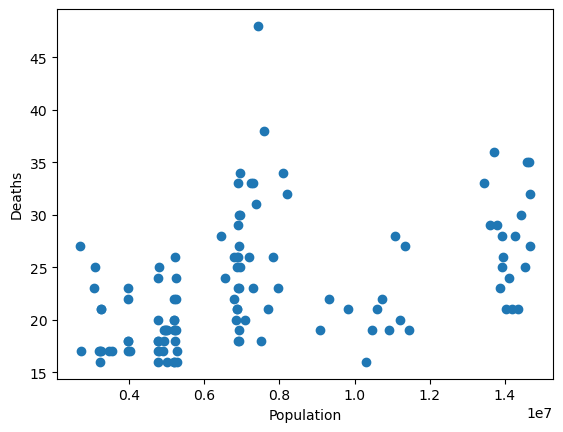

In [12]:
from pathlib import Path
plt.scatter(df_clean_male_only.Population, df_clean_male_only.Deaths)
plt.xlabel('Population')
plt.ylabel('Deaths')
plt.show()

In [13]:
X = df_clean_male_only.Population.values.reshape(-1, 1)

In [14]:
X.shape

(114, 1)

In [15]:
y = df_clean_male_only.Deaths

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression()

In [18]:
y_pred = model.predict(X)
print(y_pred.shape)

(114,)


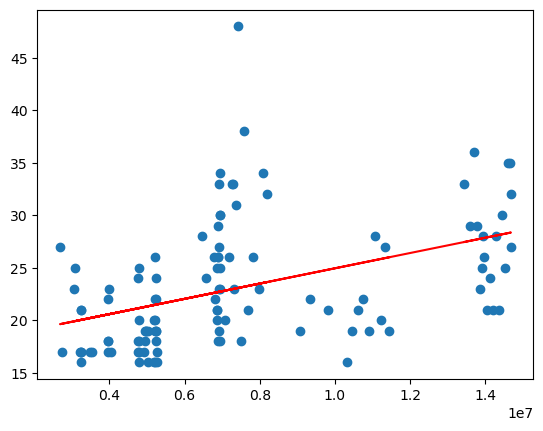

In [19]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [20]:
print(model.coef_)
print(model.intercept_)

[7.27825732e-07]
17.67692020638161
